### Pre-Processing_Part2

In [1]:
# choose users who rated the most songs
# choose songs that were rated by most users

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
music = pd.read_csv('music_edit.csv')

In [4]:
music.head()

,Unnamed: 0,rating,userID,songID,reviewText,summary,userID2,songID2
0,0,5.0,A2TYZ821XXK2YZ,3426958910,"This is awesome to listen to, A must-have for ...",Slayer Rules!,0,0
1,1,5.0,A3OFSREZADFUDY,3426958910,bien,Five Stars,1,0
2,2,5.0,A2VAMODP8M77NG,3426958910,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,2,0
3,3,4.0,AAKSLZ9IDTEH0,3426958910,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,3,0
4,4,5.0,A3OH43OZJLKI09,5557706259,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",4,1


In [5]:
music.userID2.value_counts()

24       557
345      272
723      178
1589     177
341      176
        ... 
16030      1
12841      1
16540      1
10523      1
6417       1
Name: userID2, Length: 16566, dtype: int64

In [6]:
music.songID2.value_counts()

7139     572
6962     311
7317     277
9268     259
4803     253
        ... 
10059      1
10239      1
10617      1
10745      1
10080      1
Name: songID2, Length: 11797, dtype: int64

In [7]:
count_user = Counter(music.userID2)
count_songs = Counter(music.songID2)
N = len(count_user)
M = len(count_songs)

In [8]:
type(count_user)

collections.Counter

In [9]:
N, M

(16566, 11797)

In [10]:
import numpy as np
songs_array = list(count_user.values()) 
mean = np.mean(songs_array)
std = np.std(songs_array)
CV= float(std)/mean
print (mean, std, CV)

8.770493782445973 10.211902569272821 1.1643475068315776


In [11]:
median = np.median(songs_array)
p_25 = np.percentile(songs_array, 25)
p_50 = np.percentile(songs_array, 50)
p_75 = np.percentile(songs_array, 75)
p_80 = np.percentile(songs_array, 80)
p_90 = np.percentile(songs_array, 90)
p_95 = np.percentile(songs_array, 95)
p_100 = np.percentile(songs_array, 100)
print (median)
print (p_25, p_50, p_75, p_80, p_90, p_95, p_100)

6.0
5.0 6.0 9.0 11.0 16.0 22.0 557.0


In [12]:
## every user rated in average 6 songs. First 75% of users rated only 9 or less songs, while 95% of users rated
## 22 songs or less. 5 % of the Users rated btw 22 and 557 songs. 

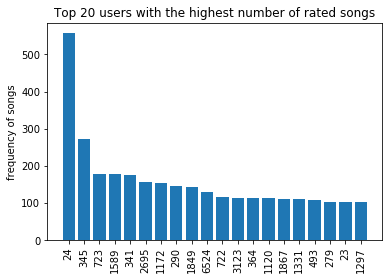

In [13]:
x, y = zip(*count_user.most_common(20))
x_pos = np.arange(len(x))  
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation = 90)
plt.ylabel('frequency of songs')
plt.title('Top 20 users with the highest number of rated songs')
 
plt.show()

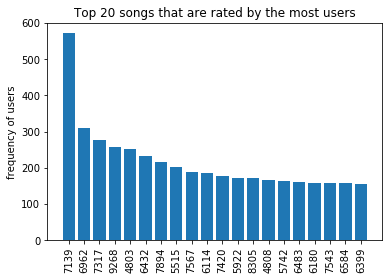

In [14]:
x, y = zip(*count_songs.most_common(20))
x_pos = np.arange(len(x))  
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation = 90)
plt.ylabel('frequency of users')
plt.title('Top 20 songs that are rated by the most users')
 
plt.show()

In [15]:
users_array = list(count_songs.values()) 
mean = np.mean(users_array)
std = np.std(users_array)
CV= float(std)/mean
print (mean, std, CV)

12.316012545562431 15.689152988865354 1.2738825111475138


In [16]:
median = np.median(users_array)
p_25 = np.percentile(users_array, 25)
p_50 = np.percentile(users_array, 50)
p_75 = np.percentile(users_array, 75)
p_80 = np.percentile(users_array, 80)
p_85 = np.percentile(users_array, 85)
p_90 = np.percentile(users_array, 90)
p_95 = np.percentile(users_array, 95)
p_100 = np.percentile(users_array, 100)
print (median)
print (p_25, p_50, p_75, p_80, p_85, p_90, p_95, p_100)

8.0
6.0 8.0 13.0 15.0 18.0 23.0 33.0 572.0


In [17]:
music.rating.value_counts()

5.0    115936
4.0     19952
3.0      6010
1.0      1822
2.0      1572
Name: rating, dtype: int64

In [18]:
music.rating.shape

(145292,)

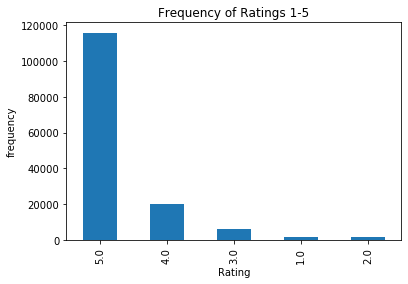

In [19]:
music.rating.value_counts().plot(kind = 'bar')
plt.xlabel("Rating")
plt.ylabel('frequency')
plt.title('Frequency of Ratings 1-5')
 
plt.show()

In [20]:
## every song was rated in average by 8 users. First 75% of users rated only 13 or less songs, while 95% of users rated
## 33 songs or less. 5 % of the Users rated btw 33 and 572 songs. 

In [21]:
# We want to measure how accurate our algortithm is : MSE
# split data into train and test
# calculate weights using train data
# using predict function (score --- predict(i,j))
# choose the users who rated the most songs and songs who were rated by the most users

In [22]:
# PARAMETERS: we can change those values and put them into the function
n, m = 1000, 1000

In [23]:
def user_song_id(m,n):
    user_id = [u for u,num in count_user.most_common(n)]
    song_id = [s for s,num in count_songs.most_common(m)]
    return user_id, song_id

In [24]:
user_id, song_id = user_song_id(m=1000,n=1000)

In [25]:
def music_small_set(user_id, song_id):
    music_small = music[music.userID2.isin(user_id)& music.songID2.isin(song_id)]
    return music_small

In [26]:
music_small = music_small_set(user_id, song_id)

In [27]:
music_small.head()

,Unnamed: 0,rating,userID,songID,reviewText,summary,userID2,songID2
23,23,5.0,A9Q28YTLYREO7,7799420340,Michael Jackson has always Been Badd period. f...,Great collection from a Musical Genius,23,3
24,24,4.0,A3W4D8XOGLWUN5,7799420340,It is hard to imagine enigma's from so many ar...,Wacko About Jacko,24,3
31,31,5.0,A1VTEL32W5FM13,7799420340,Great,Five Stars,31,3
39,39,5.0,A1DJDDPJP6THC1,7799420340,Great,Five Stars,38,3
44,44,5.0,A3F7U41ZW2FPE8,7799420340,Great as usual.,Five Stars,43,3


In [28]:
music_small.shape

(11165, 8)

In [29]:
# select data only with specific userIDs, dataIDs
# we copy the file since panads will not allow us to overwrite the data, 
# only one copy of data frame is in memory. When we want to see some rows and columns this is
# only a pointer to data frame
def select_data(n,m):
    user_id = [u for u,num in count_user.most_common(n)]
    song_id = [s for s,num in count_songs.most_common(m)]
    music_small = music[music.userID2.isin(user_id)&music.songID2.isin(song_id)].copy()
    n1 = len(Counter(music_small.userID2))
    m1 = len(Counter(music_small.songID2))
    dict1 = {uid: count for uid, count in zip(music_small.userID2.unique(), range(n1))}
    dict2 = {sid: count for sid, count in zip(music_small.songID2.unique(), range(m1))}
    music_small['user_ids'] = music_small['userID2'].apply(lambda x: dict1[x])
    music_small['songs_ids'] = music_small['songID2'].apply(lambda x: dict2[x])
    return music_small

In [30]:
music_small = select_data(1000,2500)


In [31]:
# e count how many users rated one song Item_based
count_songs_per_user = Counter(music_small.user_ids)
count_users_per_songs = Counter(music_small.songs_ids)
s = len(count_songs_per_user)
m = len(count_users_per_songs)

In [32]:
users_array = list(count_songs_per_user.values()) 
mean = np.mean(users_array)
std = np.std(users_array)
CV= float(std)/mean
print (mean, std, CV)

18.596596596596598 14.066851272874167 0.7564207353644791


In [33]:
median = np.median(users_array)
p_25 = np.percentile(users_array, 25)
p_50 = np.percentile(users_array, 50)
p_75 = np.percentile(users_array, 75)
p_80 = np.percentile(users_array, 80)
p_90 = np.percentile(users_array, 90)
p_95 = np.percentile(users_array, 95)
p_100 = np.percentile(users_array, 100)
print (median)
print (p_25, p_50, p_75, p_80, p_90, p_95, p_100)

15.0
11.0 15.0 22.0 24.0 33.0 40.0 253.0


In [34]:
songs_array_s = list(count_users_per_songs.values()) 
mean = np.mean(songs_array_s)
std = np.std(songs_array_s)
CV= float(std)/mean
print (mean, std, CV)

7.518413597733711 6.308310738321906 0.8390481125198316


In [35]:
median = np.median(songs_array_s)
p_25 = np.percentile(songs_array_s, 25)
p_50 = np.percentile(songs_array_s, 50)
p_75 = np.percentile(songs_array_s, 75)
p_80 = np.percentile(songs_array_s, 80)
p_90 = np.percentile(songs_array_s, 90)
p_95 = np.percentile(songs_array_s, 95)
p_100 = np.percentile(songs_array_s, 100)
print (median)
print (p_25, p_50, p_75, p_80, p_90, p_95, p_100)

6.0
4.0 6.0 9.0 10.0 13.0 18.0 90.0


In [36]:
music_small.to_csv("music_small.csv")